# Ucitavanje potrebnih biblioteka

In [341]:
from operator import truediv # Za float operacije deljenja nizova
from random import random # Generise random brojeve
from statistics import variance 
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.formula.api as sm


import numpy as np # Za visedimenzionalne nizove i matrice
import pandas as pd # biblioteka za dataframe
import matplotlib.pyplot as plt # biblioteka za crtanje 
import seaborn as sns # biblioteka za grafikone 

# Ucitavanje dataset-a i prikazivanje

In [340]:
cc = pd.read_csv('cc.csv') # Ucitava fajl cc.csv
cc.head(10) # Prikazuje prvih 10 redova i 23 kolone

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [5]:
cc.shape # koliko ukupno redova ima x kolona

(10127, 23)

# Opisivanje osnovnih parametara slucajnih promenljivih

In [7]:
cc.describe() # Opisuje osnovne parametre slucajnih promenljivih

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [8]:
cc.info() # daje podatke koje sve kolone imamo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [9]:
cc.loc[cc.duplicated()] # provera da li ima duplikata klijenata

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [12]:
cc['Attrition_Flag'].describe() # opisujemo kolonu aktivnosti klijenta

count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object

In [14]:
cc['Gender'].describe()

count     10127
unique        2
top           F
freq       5358
Name: Gender, dtype: object

In [20]:
ac = cc[(cc['Attrition_Flag']=='Attrited Customer')] # oni koji su otisli
ec = cc[(cc['Attrition_Flag']=='Existing Customer')] # oni koji su jos uvek klijenti
ac[['Customer_Age', 'Gender', 'Education_Level', 'Income_Category']].corr

<bound method DataFrame.corr of        Customer_Age Gender Education_Level Income_Category
21               62      F        Graduate  Less than $40K
39               66      F       Doctorate         Unknown
51               54      F        Graduate  Less than $40K
54               56      M        Graduate         $120K +
61               48      M        Graduate     $60K - $80K
...             ...    ...             ...             ...
10119            55      F      Uneducated         Unknown
10123            41      M         Unknown     $40K - $60K
10124            44      F     High School  Less than $40K
10125            30      M        Graduate     $40K - $60K
10126            43      F        Graduate  Less than $40K

[1627 rows x 4 columns]>

# Odredjivanje koeficijenata korelacije

In [16]:
ac.cov()['Total_Trans_Amt']['Credit_Limit']/(ac.std()['Total_Trans_Amt']*ac.std()['Credit_Limit']) #kovarijansa xy / stdx stdy

# Koeficijent korelacije izmedju kreditnog limita i ukupno potrosenih sredstava odlazecih klijenata


0.26492966760249476

In [22]:
ec.cov()['Total_Trans_Amt']['Credit_Limit']/(ec.std()['Total_Trans_Amt']*ec.std()['Credit_Limit'])

# Koeficijent korelacije izmedju kreditnog limita i ukupno potrosenih sredstava postojecih klijenata

0.15996961157239623

In [24]:
ac.cov()['Total_Relationship_Count']['Months_Inactive_12_mon']/(ac.std()['Total_Relationship_Count']*ac.std()['Months_Inactive_12_mon'])

# Koeficijent korelacije izmedju broja produkata koji imaju kod banke i neaktivnosti u prethodnih 12 meseci

-0.04395735068442226

In [26]:
ec.cov()['Total_Relationship_Count']['Months_Inactive_12_mon']/(ec.std()['Total_Relationship_Count']*ec.std()['Months_Inactive_12_mon'])

# Koeficijent korelacije izmedju broja produkata koji imaju kod banke i neaktivnosti u prethodnih 12 meseci

0.03078645071383905

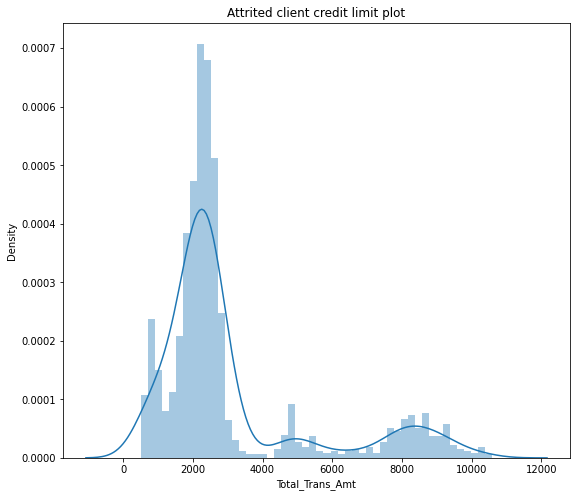

In [48]:
plt.figure(figsize=(20,8))  # Histogram - funkcija gustine verovatnoce raspodele PDF 

plt.subplot(1,2,1)
plt.title('Attrited client trax amount plot')
sns.distplot(ac.Total_Trans_Amt)


plt.show()

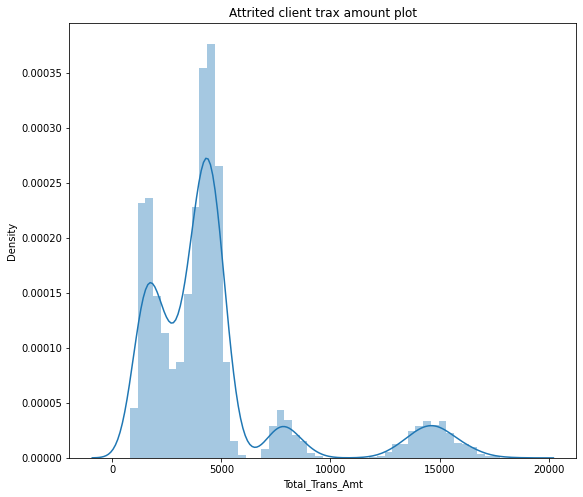

In [50]:
plt.figure(figsize=(20,8))  # Histogram - funkcija gustine verovatnoce raspodele PDF

plt.subplot(1,2,1)
plt.title('Existing client trax amount plot')
sns.distplot(ec.Total_Trans_Amt)

plt.show()

# Raspodele verovatnoca

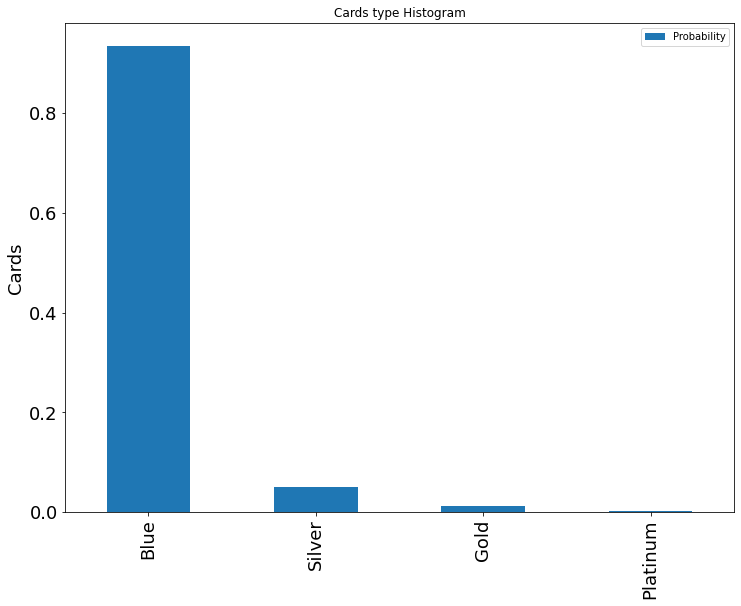

In [56]:
cards = ac["Card_Category"].value_counts()

P_cards = pd.DataFrame((cards/cards.sum()))
P_cards.columns = ['Probability']

P_cards.plot.bar(figsize=(12,9), fontsize=18)
plt.ylabel("Probability", fontsize=16)
plt.ylabel("Cards", fontsize=18)
plt.title('Cards type Histogram')
plt.show()


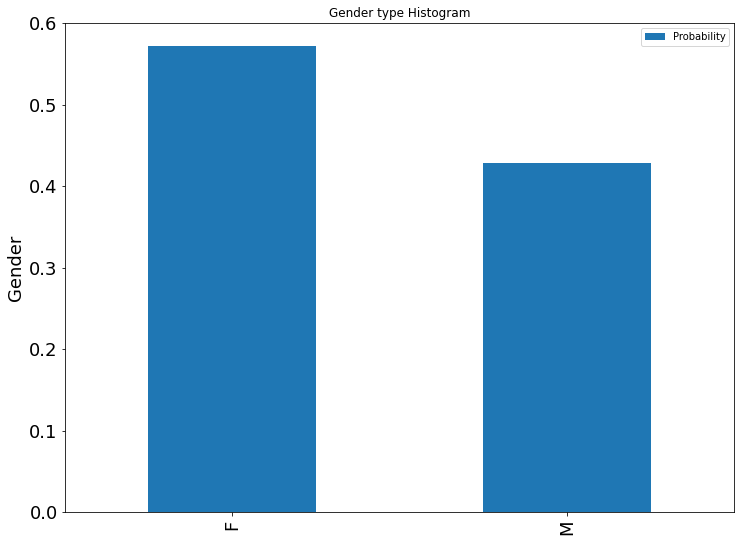

In [61]:
gender = ac["Gender"].value_counts()

P_gender = pd.DataFrame((gender/gender.sum()))
P_gender.columns = ['Probability']

P_gender.plot.bar(figsize=(12,9), fontsize=18)
plt.ylabel("Probability", fontsize=16)
plt.ylabel("Gender", fontsize=18)
plt.title('Gender type Histogram')
plt.show()

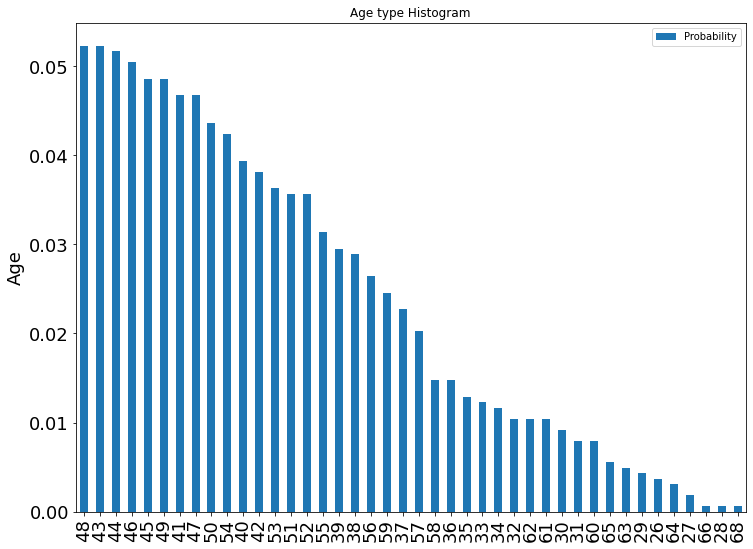

In [64]:
age = ac["Customer_Age"].value_counts()

P_age = pd.DataFrame((age/age.sum()))
P_age.columns = ['Probability']

P_age.plot.bar(figsize=(12,9), fontsize=18)
plt.ylabel("Probability", fontsize=16)
plt.ylabel("Age", fontsize=18)
plt.title('Age type Histogram')
plt.show()

# Uslovna verovatnoca

In [118]:
data_temp = cc.loc[cc['Total_Trans_Amt'] >5000, 'Attrition_Flag']
data_temp.head(30)

2571    Existing Customer
2618    Existing Customer
3159    Existing Customer
3181    Existing Customer
3345    Existing Customer
3346    Existing Customer
3466    Existing Customer
3579    Existing Customer
3747    Existing Customer
3866    Existing Customer
3979    Existing Customer
4067    Existing Customer
4072    Existing Customer
4105    Existing Customer
4126    Existing Customer
4167    Existing Customer
4200    Existing Customer
4214    Existing Customer
4225    Existing Customer
4240    Existing Customer
4253    Existing Customer
4278    Existing Customer
4290    Existing Customer
4296    Existing Customer
4303    Existing Customer
4383    Existing Customer
4396    Existing Customer
4449    Existing Customer
4470    Existing Customer
4471    Existing Customer
Name: Attrition_Flag, dtype: object

Verovatnoca da ce klijent otici pod uslovom da trosi vise od 5000:


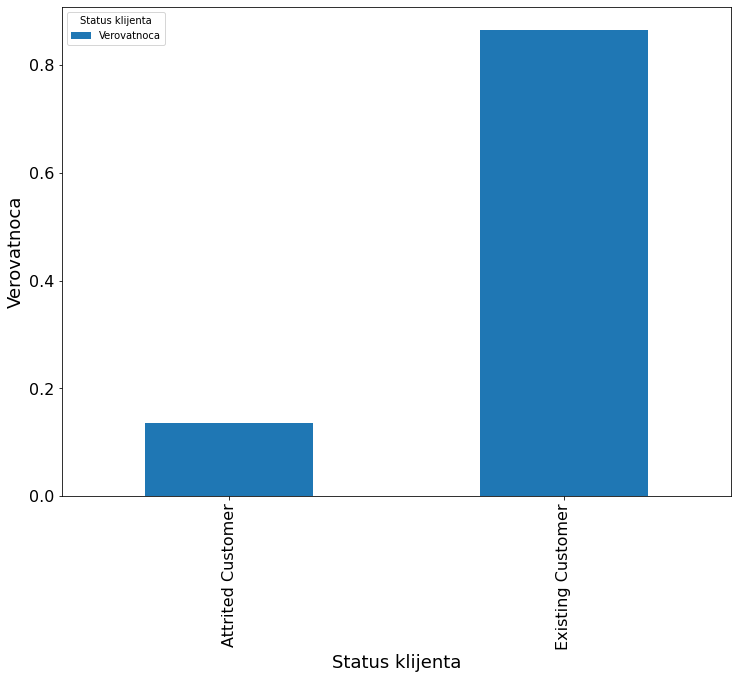

In [119]:
P_T_pod_usl_potrosnja= pd.DataFrame((data_temp.value_counts()/data_temp.shape[0]).sort_index())
P_T_pod_usl_potrosnja.columns = ["Verovatnoca"]
print("Verovatnoca da ce klijent otici pod uslovom da trosi vise od 5000:")
P_T_pod_usl_potrosnja.columns.name="Status klijenta"
P_T_pod_usl_potrosnja.plot(kind='bar',figsize=(12,9),fontsize=16)
plt.xlabel("Status klijenta",fontsize=18)
plt.ylabel("Verovatnoca",fontsize=18)
plt.show()

# Intervali poverenja

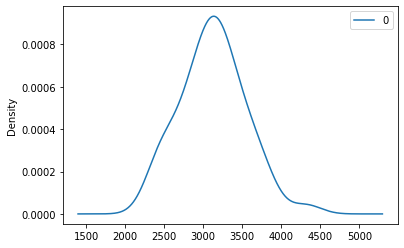

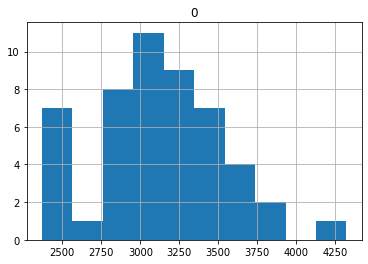

In [344]:
sample_size = 30   # bvelicina uzorka - do 30 nepoznata je varijansa koristi se kvantil studentove raspodele
number_estimations_of_means = 50; # ovo je broj estimacija, svaki je baziran na uzorku velicine 50
sample_of_means = []

for i in range(number_estimations_of_means):
    sample_of_means.append(ac['Total_Trans_Amt'].sample(sample_size).mean()) # ocena matematickog ocekivanja
    
pd.DataFrame(sample_of_means).plot(kind="density") 
hist = pd.DataFrame(sample_of_means).hist()
plt.show()

2975.866666666667
(2659.179083495618, 4219.8542498377155)


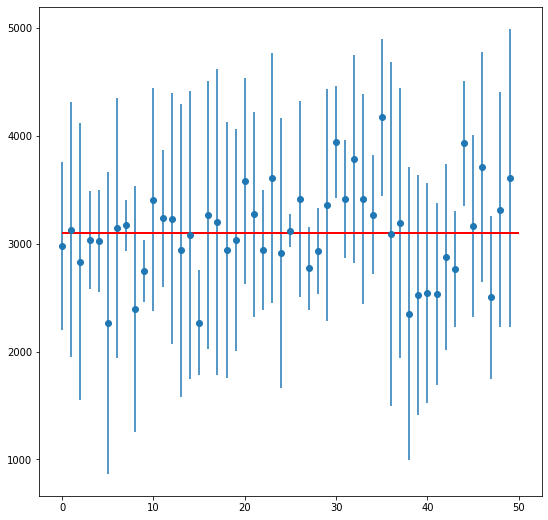

In [194]:
alpha = 0.05  #verovatnoca da estimacija ocekivanja pripada intervalu je 0.95
quantil_order = 1-alpha/2 # red kvantila 
Intervals_of_confidence = [] # lista interval

Quantil = stats.t.ppf(quantil_order, df=sample_size-1) # kvantil (t) raspodele reda 0.975

for i in range(number_estimations_of_means):
    margin = Quantil * (ac['Total_Trans_Amt'].sample(sample_size).std()/sample_size**0.5)
    interval_of_confidence = (ac['Total_Trans_Amt'].sample(sample_size).mean() - margin, ac['Total_Trans_Amt'].sample(sample_size).mean() + margin)
    Intervals_of_confidence.append(interval_of_confidence)
    
    
print(sample_of_means[0]) # stampamo estimiranu vrednost
print(Intervals_of_confidence[0]) # stampamo samo jedan interval poverenja

plt.figure(figsize=(9,9)) # 9 inch sa 9 inch

# crtamo intervale pomocu plt.errorbar:
plt.errorbar(x=np.arange(0,50),
             y=sample_of_means[0:50],
             yerr= [(up-down)/2 for up, down in Intervals_of_confidence],
             fmt='o')

plt.hlines(xmin=0, xmax=50,
           y=ac.mean()['Total_Trans_Amt'],
           linewidth=2.0,
           color="red")

plt.show()



# Linearna regresija

In [197]:
ac

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.99691,0.003088
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.99527,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.99788,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.99671,0.003294


In [330]:
temp = ac[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']] 
ac_lr = temp.iloc[:101]
ac_lr.head()

,Customer_Age,Dependent_count,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,62,0,49,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,66,0,56,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,54,1,40,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,56,2,36,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,48,2,35,34516.0,0,34516.0,0.763,691,15,0.500,0.000


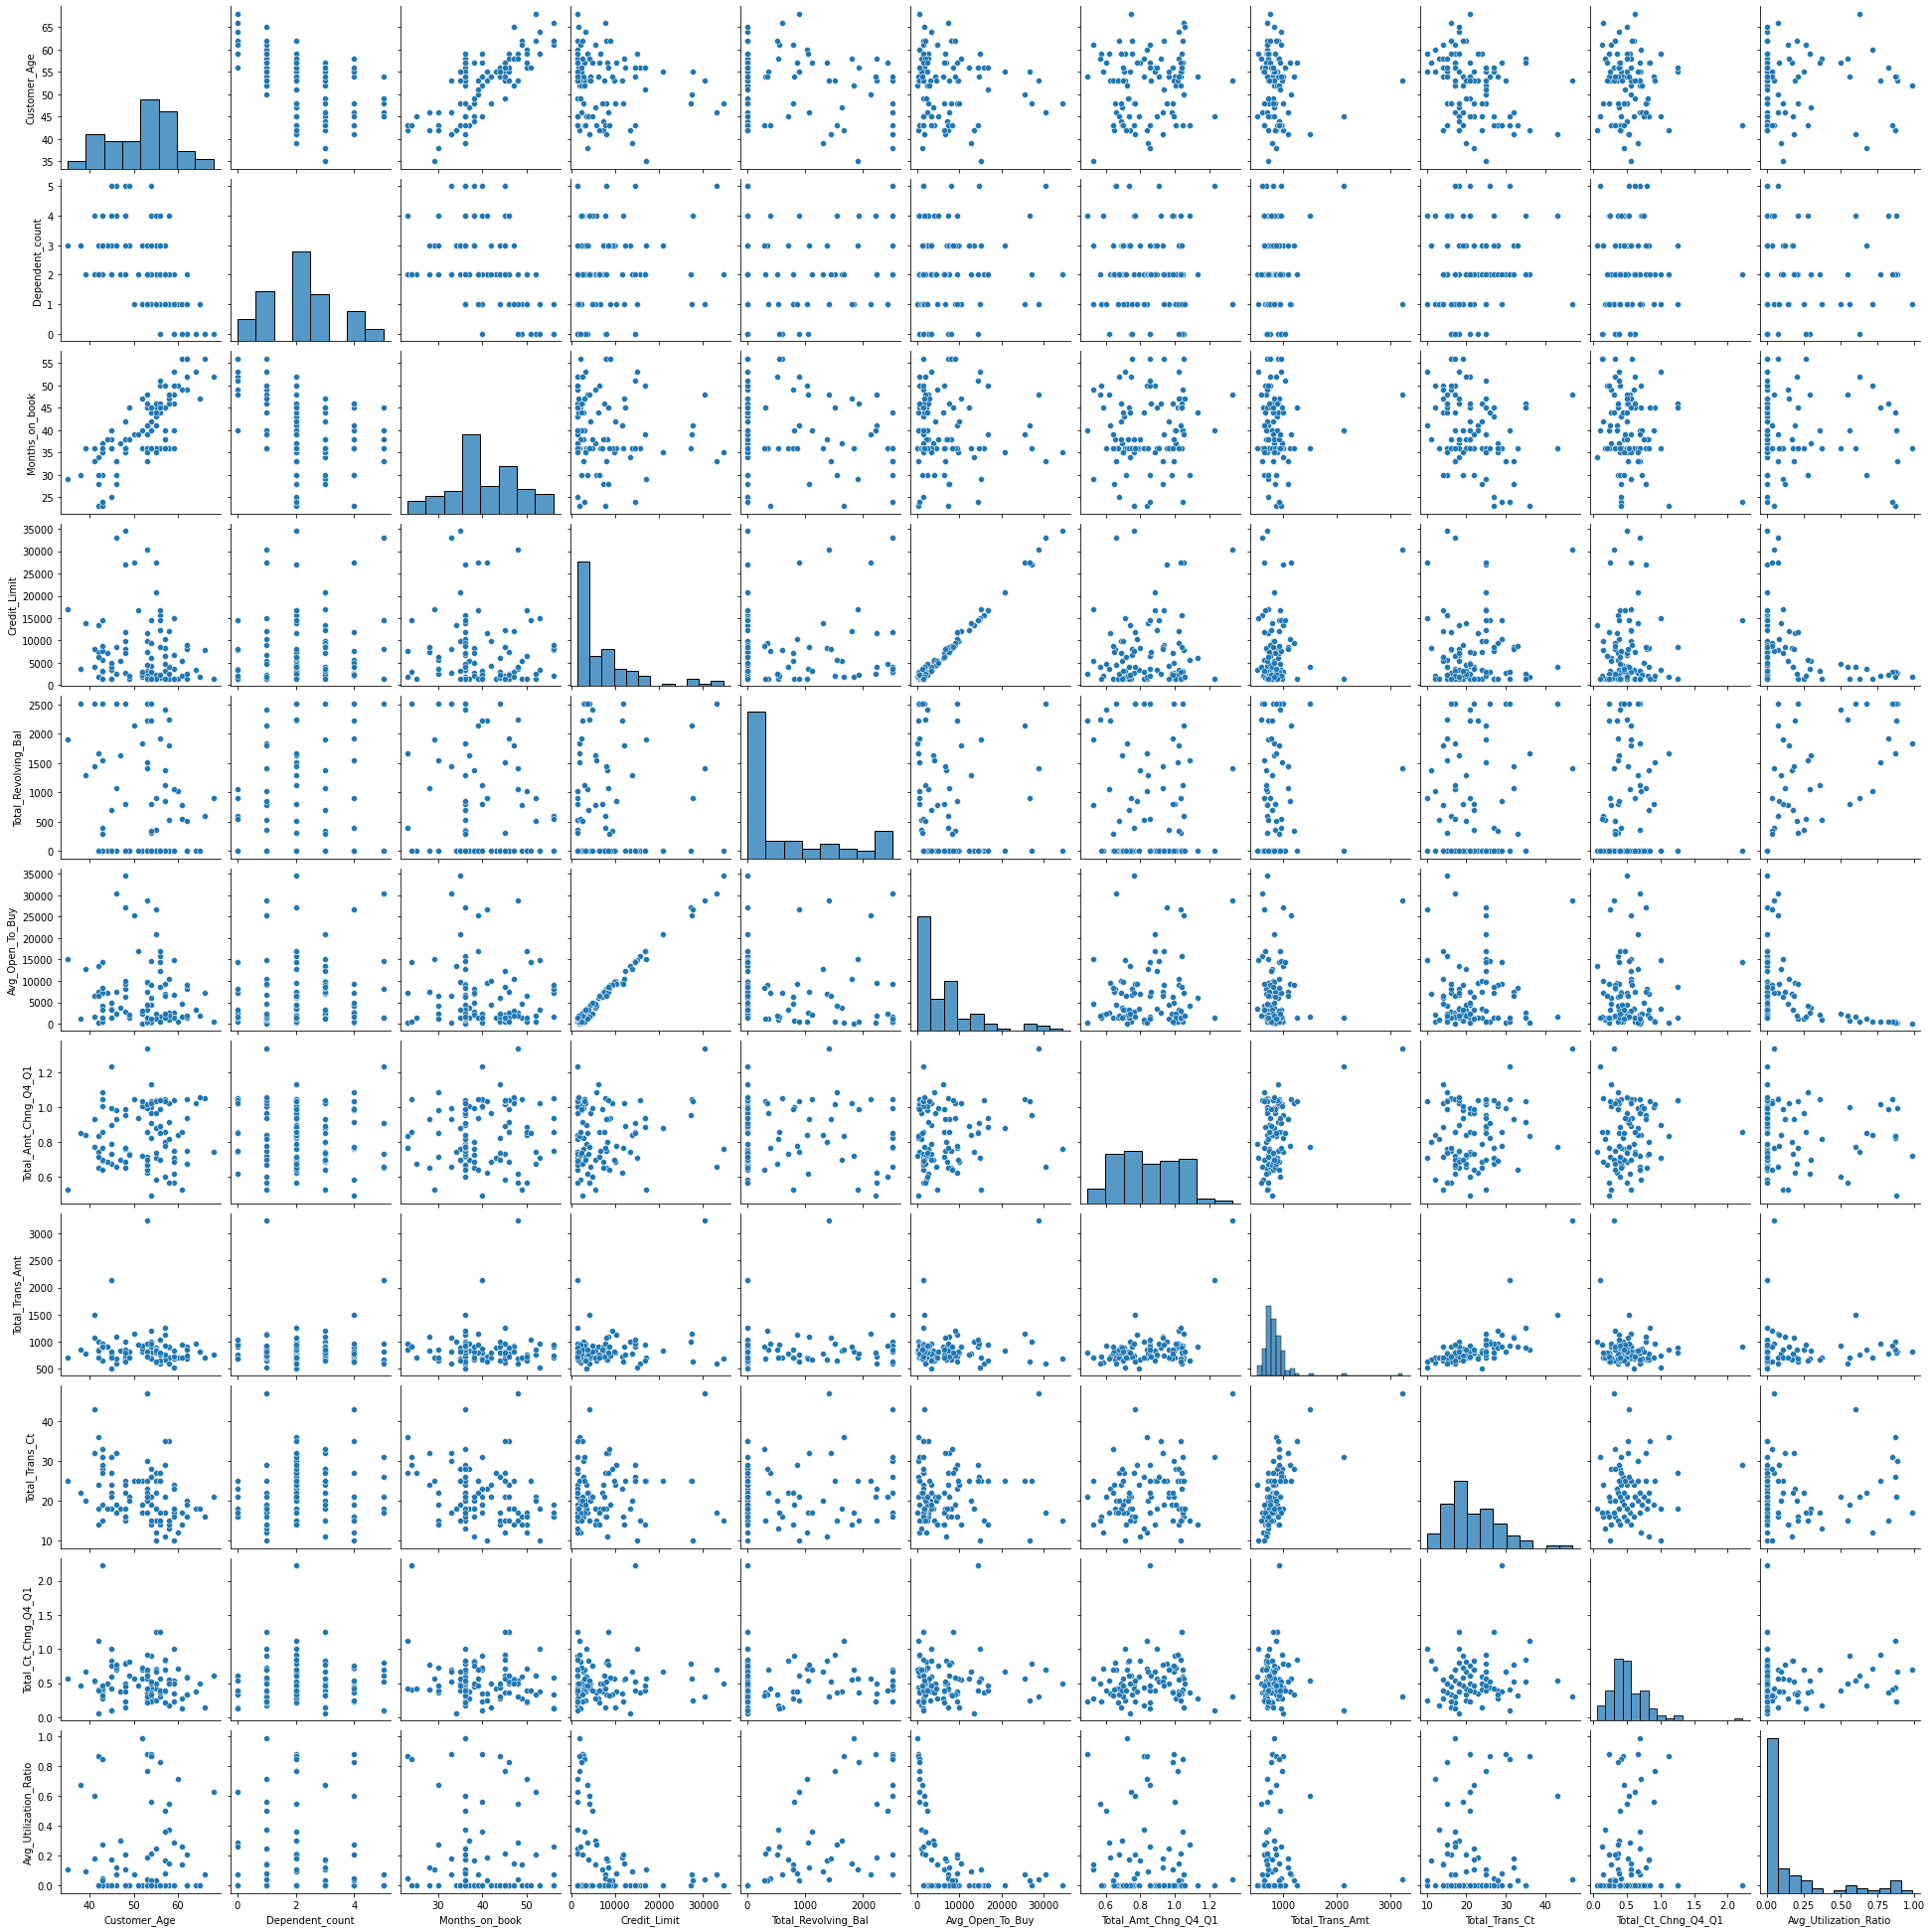

In [331]:
sns.pairplot(ac_lr) # pokazuje koje promenljive bi mogle da imaju dobru regresiju
plt.show()

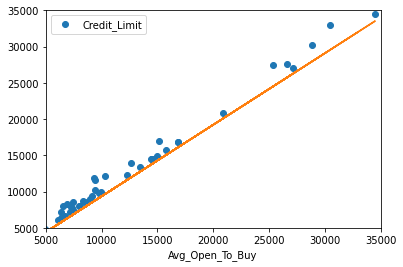

In [332]:
Result_1= sm.ols('Avg_Open_To_Buy ~ Credit_Limit', ac_lr).fit()
#Result_2 = sm.ols('Avg_Open_To_Buy ~ Credit_Limit', ac_lr[:-1]).fit()
ac_lr.plot('Avg_Open_To_Buy', 'Credit_Limit', style='o')
plt.plot(ac_lr.Credit_Limit, Result_1.fittedvalues)
#plt.plot(ac_lr.Credit_Limit[:-1], Result_2.fittedvalues)
plt.xlim([5000,35000])
plt.ylim([5000,35000])
plt.show()

In [333]:
print(Result_1.summary())
#print(Result_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Open_To_Buy   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7184.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.20e-94
Time:                        17:09:49   Log-Likelihood:                -824.86
No. Observations:                 101   AIC:                             1654.
Df Residuals:                      99   BIC:                             1659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -520.6180    119.966     -4.340   